In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys


class ising_model:
    def __init__(self, size, beta, V):
        self.size = size
        self.beta = beta
        self.V = V
        self.E = np.zeros((2, size, size))
        self.cluster = np.zeros((size, size))

    def create_edges(self):
        for i in range(self.size):
            for j in range(self.size):
                if i + 1 < self.size:
                    if self.V[i + 1][j] == self.V[i][j]:
                        self.E[0, i, j] = np.random.binomial(n=1, p=1 - np.exp(-self.beta))
                    else:
                        self.E[0, i, j] = 0

                if j + 1 < self.size:
                    if self.V[i][j + 1] == self.V[i][j]:
                        self.E[1, i, j] = np.random.binomial(n=1, p=1 - np.exp(-self.beta))
                    else:
                        self.E[1, i, j] = 0

    def find_cluster(self, i, j, label):
        if self.cluster[i, j] == 0:
            self.cluster[i, j] = label

        if i + 1 < self.size:
            if self.cluster[i + 1, j] == 0 and self.E[0, i, j] == 1:
                self.find_cluster(i + 1, j, label)

        if j + 1 < self.size:
            if self.cluster[i, j + 1] == 0 and self.E[1, i, j] == 1:
                self.find_cluster(i, j + 1, label)

        if i - 1 > -1:
            if self.cluster[i - 1, j] == 0 and self.E[0, i - 1, j] == 1:
                self.find_cluster(i - 1, j, label)

        if j - 1 > -1:
            if self.cluster[i, j - 1] == 0 and self.E[1, i, j - 1] == 1:
                self.find_cluster(i, j - 1, label)
        return

    def flip_all_sites(self, label):
        flip = np.random.choice(2, size=label)
        for i in range(self.size):
            for j in range(self.size):
                self.V[i, j] = flip[int(self.cluster[i, j]) - 1]

    def calc_H(self):
        result = 0
        for i in range(self.size):
            for j in range(self.size):
                if i + 1 < self.size:
                    result += int(self.V[i + 1][j] != self.V[i][j])
                if j + 1 < self.size:
                    result += int(self.V[i][j + 1] != self.V[i][j])
        return result / 2 / self.size**2

    def sample_update(self):
        self.create_edges()
        label = 0
        for i in range(self.size):
            for j in range(self.size):
                if self.cluster[i, j] == 0:
                    label += 1
                    self.find_cluster(i, j, label)
        self.flip_all_sites(label)
        avg_CP = self.size * self.size / label

        return self.calc_H(), avg_CP, self.V


In [6]:
def plot_chains(t_1, H_1, t_2, H_2, beta, h):
    fig = plt.figure()
    plt.plot(range(t_1 + 1), H_1, marker='.', color='green', linewidth=0.9)
    plt.plot(range(t_2 + 1), H_2, marker='.', color='darkblue', linewidth=0.9)
    plt.ylabel('H(X)')
    plt.xlabel('Sweeps')
    plt.grid()
    if h:
        plt.axhline(y=h, color='black', linestyle=':')
    plt.annotate(str(t_1), xy=(t_1, H_1[-1]), xytext=(t_1, H_1[-1] - 0.1), arrowprops=dict(facecolor='red', shrink=0.003, width=2, headwidth=7))
    plt.annotate(str(t_2), xy=(t_2, H_2[-1]), xytext=(t_2, H_2[-1] + 0.1), arrowprops=dict(facecolor='red', shrink=0.003, width=2, headwidth=7))
    plt.legend(['Constant Image', 'Checkerboard Image'], loc='upper right')
    plt.title('Sufficient Statistics H(X) for beta = ' + str(beta))
    fig.savefig('./cluster-sampling-imgs/sw-beta=' + str(beta) + '.png')


In [7]:
def sample(n, beta, X, h):
    X_copy = np.copy(X)
    ising = ising_model(n, beta, X_copy)
    Hvals = ising.calc_H()
    avg_CPs = np.empty(0)
    n_sweeps = 0
    while True:
        H, avg_CP, X_copy = ising.sample_update()
        Hvals = np.append(Hvals, H)
        avg_CPs = np.append(avg_CPs, avg_CP)
        n_sweeps += 1

        if abs(H - h) < 0.001:
            break
        ising = ising_model(n, beta, X_copy)
    return Hvals, n_sweeps, avg_CPs


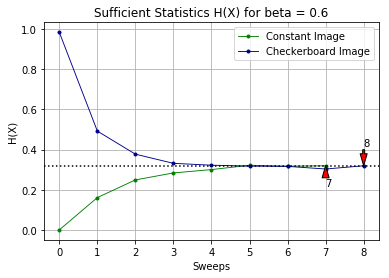

In [8]:
sys.setrecursionlimit(1500)

size = 64
constant = np.zeros((size, size))
cb = np.empty((size, size))  # checkerboard
for i in range(size):
    for j in range(size):
        cb[i, j] = (i + j) % 2

# beta = 0.6
Hvals_constant_1, sweeps_constant_1, avg_CPs_constant_1 = sample((size), 0.6, constant, 0.3194)
Hvals_cb_1, sweeps_cb_1, avg_CPs_cb_1 = sample((size), 0.6, cb, 0.3194)
plot_chains(sweeps_constant_1, Hvals_constant_1, sweeps_cb_1, Hvals_cb_1, 0.6, 0.3194)


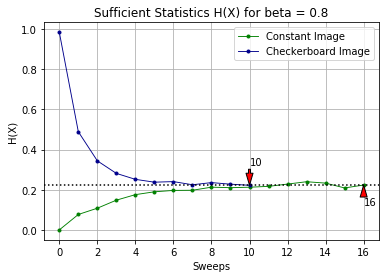

In [9]:
# beta = 0.8
Hvals_constant_2, sweeps_constant_2, avg_CPs_constant_2 = sample((size), 0.8, constant, 0.2231)
Hvals_cb2, sweeps_cb2, avg_CPs_cb2 = sample((size), 0.8, cb, 0.2231)
plot_chains(sweeps_constant_2, Hvals_constant_2, sweeps_cb2, Hvals_cb2, 0.8, 0.2231)


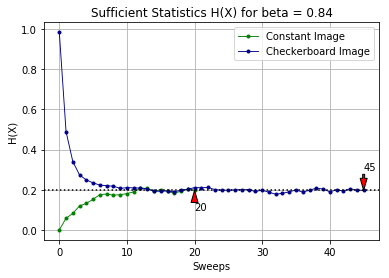

In [10]:
# beta = 0.84
Hvals_constant_3, sweeps_constant_3, avg_CPs_constant_3 = sample((size), 0.84, constant, 0.1966)
Hvals_cb_3, sweeps_cb_3, avg_CPs_cb_3 = sample((size), 0.84, cb, 0.1966)
plot_chains(sweeps_constant_3, Hvals_constant_3, sweeps_cb_3, Hvals_cb_3, 0.84, 0.1966)


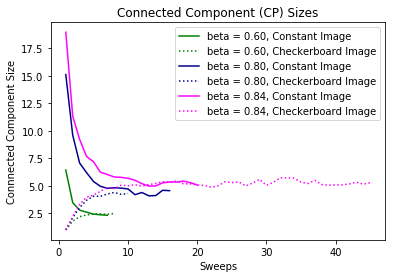

In [11]:
fig = plt.figure()
plt.plot(range(1, sweeps_constant_1 + 1), avg_CPs_constant_1, color='green')
plt.plot(range(1, sweeps_cb_1 + 1), avg_CPs_cb_1, color='green', linestyle=':')
plt.plot(range(1, sweeps_constant_2 + 1), avg_CPs_constant_2, color='darkblue')
plt.plot(range(1, sweeps_cb2 + 1), avg_CPs_cb2, color='darkblue', linestyle=':')
plt.plot(range(1, sweeps_constant_3 + 1), avg_CPs_constant_3, color='magenta')
plt.plot(range(1, sweeps_cb_3 + 1), avg_CPs_cb_3, color='magenta', linestyle=':')
plt.legend(['beta = 0.60, Constant Image', 'beta = 0.60, Checkerboard Image', 'beta = 0.80, Constant Image', 'beta = 0.80, Checkerboard Image', 'beta = 0.84, Constant Image', 'beta = 0.84, Checkerboard Image'], loc='upper right')
plt.ylabel('Connnected Component Size')
plt.xlabel('Sweeps')
plt.title('Connected Component (CP) Sizes')
fig.savefig('./cluster-sampling-imgs/cp.png')
